# TP - Sentiment Analysis 
- Balanced dataset with augmentation
- Augmentation only on minority class
- TF-IDF





## Imports and loading data

In [ ]:
!python --version

Python 3.8.16


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# "Mount" do Google Drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/df_augmented.csv')

df

Mounted at /content/drive


,Unnamed: 0,Phrase,Target
0,0,always experience gf gone first like oh cool m...,Neutral
1,1,right people maybe wont kill feel isolated lon...,Negative
2,2,know youre lonely come promise take care,Positive
3,3,give boost lonely she28ric,Positive
4,4,getting lonely top,Negative
...,...,...,...
2802,2802,found love hopeless position,Positive
2803,2803,dont like thing midway even hopeless need leas...,Positive
2804,2804,corrie x manna from heaven helped many jewish ...,Positive
2805,2805,copy cherry dud arrived unexpectedly early pul...,Positive


## Class distribution

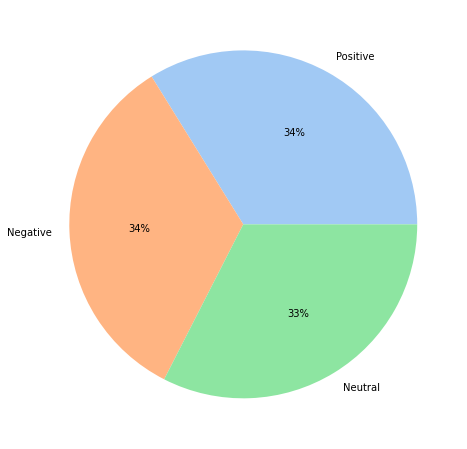

In [ ]:
# Class distribution

countPositives = df[df.Target == 'Positive'].Target.count()
countNegatives = df[df.Target == 'Negative'].Target.count()
countNeutral = df[df.Target == 'Neutral'].Target.count()

data = [countPositives,countNegatives,countNeutral]
labels = ['Positive', 'Negative', 'Neutral']

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df.Phrase)
dense = vectors.todense()

df['vectorTdfIdf'] = dense.tolist()

In [ ]:
print(vectorizer.get_feature_names())

['000', '001', '02', '10', '100', '100x', '11', '12', '125', '13', '1312', '14', '145', '15', '19', '1950s', '1971', '20', '2006', '2011', '2013', '2014', '2015', '2017', '2018', '2019', '2020', '2021', '2022', '20s', '21', '22', '223', '23', '23th', '24', '25', '253days', '258', '263', '273', '2km', '2nd', '30', '300', '30pm', '30s', '33', '333', '35', '37', '3cmi0ko', '3days', '3l', '40', '40s', '42', '43', '4424', '45', '4929', '4am', '4ever', '4koma', '4th', '50', '504', '512', '663', '67', '69', '6v38pk0', '70', '70k', '75', '79', '7am', '7p', '80', '800', '82', '8255', '85', '89', '8th', '90', '90s', '911', '947', '95', 'a3', 'aaaaaalwaysssss', 'aaaaah', 'aaaah', 'aaron', 'aback', 'abandon', 'abandoned', 'abbey', 'ability', 'abject', 'able', 'abortion', 'about', 'absence', 'absolute', 'absolutely', 'abt', 'abundant', 'abuse', 'abusers', 'abusive', 'academic', 'academically', 'acads', 'acc', 'accentuated', 'accept', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'a

In [ ]:
df_final = pd.DataFrame(data = dense.tolist(), columns = vectorizer.get_feature_names())
df_final['Target'] = df.Target

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Columns: 6312 entries, 000 to Target
dtypes: float64(6311), object(1)
memory usage: 135.2+ MB


In [ ]:
from pycaret.classification import *

In [ ]:
# Pre-processing steps to fix target 

for i, value in enumerate(df_final['Target']):
  df_final['Target'][i] = value.strip()
  if value == 'Nuetral':
    df_final['Target'][i] = 'Neutral'

In [ ]:
df_final['Target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df_final

,000,001,02,10,100,100x,11,12,125,13,1312,14,145,15,19,1950s,1971,20,2006,2011,2013,2014,2015,2017,2018,2019,2020,2021,2022,20s,21,22,223,23,23th,24,25,253days,258,263,273,2km,2nd,30,300,30pm,30s,33,333,35,37,3cmi0ko,3days,3l,40,40s,42,43,4424,45,4929,4am,4ever,4koma,4th,50,504,512,663,67,69,6v38pk0,70,70k,75,79,7am,7p,80,800,82,8255,85,89,8th,90,90s,911,947,95,a3,aaaaaalwaysssss,aaaaah,aaaah,aaron,aback,abandon,abandoned,abbey,ability,abject,able,abortion,about,absence,absolute,absolutely,abt,abundant,abuse,abusers,abusive,academic,academically,acads,acc,accentuated,accept,acceptance,accepted,accepting,access,accessible,accessory,accident,accidentally,accommodations,accomplish,accomplished,accord,according,accordingly,account,accountability,accountable,accounts,accumulate,accusations,accustomed,accutane,ace,ache,achieve,achieving,acid,acidosis,acknowledge,acquaintance,acquire,across,act,acting,action,activating,active,activities,activity,actors,acts,actual,actually,ad,adams,adapt,add,added,adderall,addicted,addiction,adding,additional,address,addressing,adenosine,adept,adhd,adj,adjust,adjustments,administered,admire,admirer,admit,adolescents,adopting,adorable,adoring,adorn,adrianna,ads,adult,adults,advanced,advances,advantage,advent,adventure,advertise,advertisers,advice,advise,advocates,aesthetic,aesthetically,af,affair,affairs,affect,affected,affection,affects,affinity,affliction,affluent,afford,afraid,africa,african,afterwards,age,ageless,agencies,agent,ages,agh,ago,agone,agony,agree,agreement,aground,ah,ahead,ahhh,ahhhhh,ai,ailment,aim,aimed,aiming,aint,air,airpod,ajdhsahaaaaaaa,ajg,ajitators,albatross,alcohol,alcoholic,alcoholics,...,warmth,wars,wash,wasnt,waste,wasted,watch,watched,watches,watching,watchword,water,wave,waves,way,wayne,ways,wayyyy,wbssb,wdnacmn,weak,weakling,weakness,wealth,weaners,weaning,wear,wearing,wears,weather,web,wed,wedding,wednesday,wee,weed,week,weekdaysbut,weekend,weeks,weep,weighed,weighing,weighs,weight,weightiness,weights,weighty,weird,weirdest,wel,welcome,well,wellbutrin,wellness,welp,wemen,wendell,wendy,went,wentt,werent,werk,western,westminster,weve,wey,whale,whatever,whats,whatsoever,whattttt,whence,whenever,whereof,wheres,whether,whichhhhhh,whining,whisper,whispers,whistleblower,whit,white,whoever,whole,wholesome,whore,whos,whys,wi,wibu,wicked,widens,widespread,widower,wife,wild,wilderness,wildness,wilhelm,wille,willed,william,williams,willing,willow,win,wind,windows,windswept,wine,wing,wings,winners,winnings,wins,winter,wiped,wise,wish,wishes,wishing,wit,with,withdraw,withdrawal,withdrawals,withholding,within,without,witness,wizardly,woe,wok,woke,wokeness,wolf,wolves,woman,women,wonder,wonderful,wondering,wondrous,wont,woods,wooonn,wooooook,word,words,work,workable,worked,workers,working,workout,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthy,would,wouldnt,wow,wrap,wrapping,wreck,wretched,wrinkles,wrist,write,writer,writers,writing,written,wrong,wrote,wtf,wtv,wyd,xanax,xbox,xd,xe,xer,xx,ya,yada,yall,ye,yea,yeah,year,yearn,yearning,years,yell,yelling,yelped,yeonbin,yep,yes,yess,yesss,yesterday,yet,yh,yikes,yo,yoga,york,you,youd,youll,young,younger,youngster,youre,yourrrr,youth,youthful,youtube,youuu,youve,yr,yt,yummyyyy,zach,zapping,zaps,zel,zelink,zen,zero,zhdhshs,zhongli,zizzy,zodiacs,zoloft,zone,zzl,zzzzzzzzzz,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Classification with PyCaret

In [ ]:
# 70/30 - train and test split by default

exp_1 = setup(data=df_final, target='Target', numeric_features=df_final.drop(['Target'], axis=1).columns.tolist())

,Description,Value
0,session_id,5566
1,Target,Target
2,Target Type,Multiclass
3,Label Encoded,"Negative: 0, Neutral: 1, Positive: 2"
4,Original Data,"(2807, 6312)"
5,Missing Values,False
6,Numeric Features,6311
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['000', '001', '02',
                                                          '10', '100', '100x',
                                                          '11', '12', '125',
                                                          '13', '1312', '14',
                                                          '145', '15', '19',
                                                          '1950s', '1971', '20',
                                                          '2006', '2011',
                                 

In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6609,0.8308,0.6607,0.6654,0.6610,0.4911,0.4926,4.400
lr,Logistic Regression,0.6481,0.8130,0.6482,0.6509,0.6472,0.4723,0.4740,3.186
ridge,Ridge Classifier,0.6436,0.0000,0.6437,0.6460,0.6428,0.4654,0.4668,0.401
rf,Random Forest Classifier,0.6359,0.8154,0.6359,0.6424,0.6362,0.4537,0.4557,2.584
svm,SVM - Linear Kernel,0.6329,0.0000,0.6331,0.6346,0.6301,0.4494,0.4522,1.406
gbc,Gradient Boosting Classifier,0.5977,0.7756,0.5977,0.6013,0.5970,0.3965,0.3981,20.651
lightgbm,Light Gradient Boosting Machine,0.5825,0.7662,0.5826,0.5829,0.5812,0.3737,0.3746,0.936
ada,Ada Boost Classifier,0.5718,0.7244,0.5721,0.5763,0.5688,0.3579,0.3611,2.037
dt,Decision Tree Classifier,0.5606,0.6702,0.5605,0.5628,0.5598,0.3406,0.3417,0.384
nb,Naive Bayes,0.5316,0.6614,0.5304,0.5374,0.5268,0.2962,0.3009,0.183


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5566, verbose=0,
                     warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5566, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0

In [ ]:
cmp_results = pull()

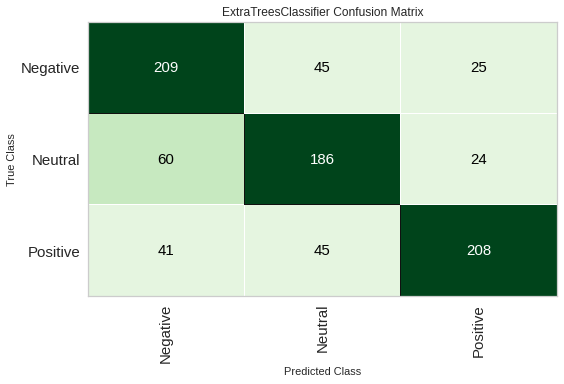

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[0], plot = 'confusion_matrix')

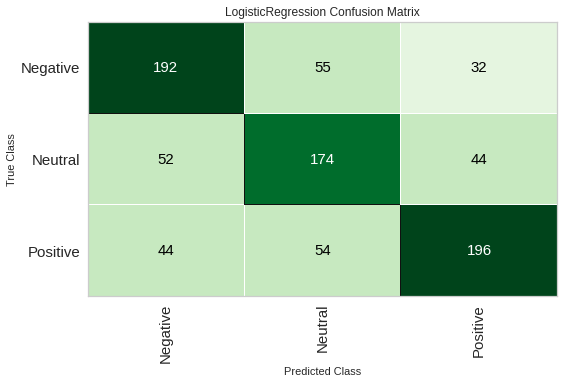

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[1], plot = 'confusion_matrix')

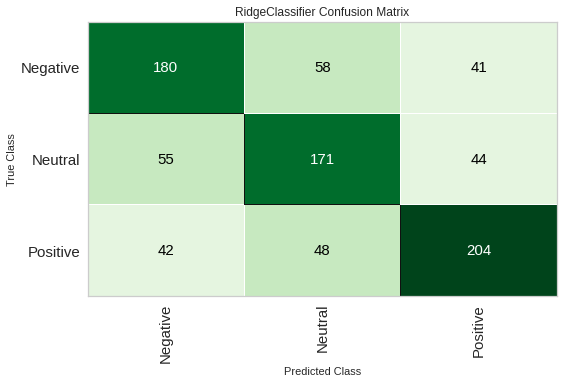

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[2], plot = 'confusion_matrix')

In [ ]:
tune_model(top3[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5533,0.7844,0.5578,0.5828,0.5462,0.3337,0.3493
1,0.5990,0.7662,0.6032,0.6449,0.5970,0.4018,0.4208
2,0.5279,0.7579,0.5319,0.5476,0.5195,0.2953,0.3064
3,0.5736,0.7720,0.5732,0.5824,0.5752,0.3608,0.3624
4,0.5612,0.7781,0.5635,0.5582,0.5562,0.3428,0.3450
5,0.5918,0.7590,0.5916,0.5988,0.5931,0.3882,0.3896
6,0.5051,0.7195,0.5068,0.5100,0.5011,0.2588,0.2620
7,0.6224,0.7380,0.6244,0.6260,0.6197,0.4345,0.4377
8,0.5816,0.7537,0.5835,0.5975,0.5813,0.3744,0.3802


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=2, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                     oob_score=False, random_state=5806, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=2, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                     oob_score=False, random_state=5806, verbose=0,
                     warm_start=False)

In [ ]:
boosted_lr = ensemble_model(top3[0], method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5347,0.7080,0.4827,0.5646,0.5167,0.2342,0.2461
1,0.5625,0.7393,0.5101,0.5824,0.5442,0.2801,0.2943
2,0.5417,0.6997,0.4594,0.5284,0.4755,0.2347,0.2565
3,0.5556,0.7638,0.4839,0.5600,0.5178,0.2595,0.2801
4,0.5594,0.7207,0.4986,0.5657,0.5339,0.2689,0.2870
5,0.6154,0.7538,0.5468,0.6326,0.5855,0.3579,0.3880
6,0.5524,0.7610,0.4750,0.5560,0.5122,0.2432,0.2742
7,0.5385,0.7536,0.4666,0.5376,0.5004,0.2235,0.2481
8,0.5594,0.7188,0.4735,0.5289,0.5124,0.2590,0.2845


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=6662,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=

In [ ]:
predict_model(top3[0])

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5566, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7153,0.858,0.7152,0.7212,0.7164,0.5732,0.5747


,10,11,13,1312,14,145,15,19,1950s,20,...,zhdhshs,zhongli,zizzy,zodiacs,zone,zzl,zzzzzzzzzz,Target,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.84
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.59
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.48
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Neutral,0.79
839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.87
840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Neutral,0.76
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Neutral,0.96


In [ ]:
bm_results = pull()

In [ ]:
cmp_results.to_csv('compare_results_exp3.csv')
bm_results.to_csv('best_model_results_exp3.csv')